# Podstawy Sztucznej Inteligencji 2020/2021


Prosze uzupelnic kod tam gdzie znajduje napis `YOUR CODE HERE` lub 'YOUR ANSWER HERE'.

Warto zresetowac 'kernel' i sprawdzic czy caly notatnik uruchamiany od poczatku nie daje bledow.

---

## Rozkład Gaussa 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
data = np.load('banana.npz')
print(data.keys())
print(data['data'].shape,data['labels'].shape)

KeysView(<numpy.lib.npyio.NpzFile object at 0x7faaeaf4e510>)
(1500, 2) (1500,)


## Zadanie

1. Wybierz dane odpowiadające klasie z etykietą $1$ i zapisz do tablicy `X`
2. Oblicz średnie: $m_1,m_2$ i odchylenia standardowe $\sigma_1,\sigma_2$ w klasie    $1$, dla każdego komponentu osobno.


In [2]:
for k in data.keys():
    print(k,'->',data[k].shape)

data -> (1500, 2)
labels -> (1500,)


In [3]:
X = data['data'][data['labels']==1]

In [4]:
np.testing.assert_allclose( X.shape, (815, 2) )
np.testing.assert_allclose( X[123],[-0.11709165,1.4678306 ] )

In [5]:
m1,m2 = np.mean(X,axis=0)
s1,s2 = np.std(X,axis=0)

In [6]:
np.testing.assert_allclose([m1,m2,s1,s2],
                           [0.076560178,0.048988096, 0.9176412, 1.08681302],rtol=1e-3)

## Narysuj 

Jeśli przybliżamy nasz zbiór rozkładem Gaussa, będącym iloczynem:

$$P(x,y)  = P(x) P(y)$$

to możemy wylosować łatwo próbkę (sample) używając generatora gausowskich liczb  losowych o średniej zero i wariancji jeden. Zauważmy, że należy przeskalować takie liczby samodzielnie, mnożąć je przed odchylenie standardowe i dodając wartość średnią.

Porównajmy 1000 tak wygenerowanych danych z prawdziwymi danymi z pierwszej klasy.

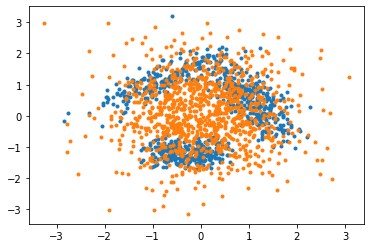

In [7]:
plt.plot(X[:,0],X[:,1],'.')
plt.plot(m1+s1*np.random.randn(1000),m2+s2*np.random.randn(1000),'.')